In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [417]:
df = pd.read_csv("./data/used-bikes.csv")
df.head()

,Summary,url,Title,Post_Details,Bike Type,Brand,Trim/Edition,Model,Year,Mileage,Seller,Capacity,Price
0,"Atv beach bike 201435,000 kmKegalle, Motorbike...",https://ikman.lk/en/ad/atv-beach-bike-2014-for...,Atv beach bike 2014,"Posted on 30 Jan 9:02 am, Kegalle City, Kegalle",Quadricycles,Other brand,Atv beach bike,Other model,2014,"35,000 km",lakee,150 cc,"Rs 440,000"
1,"Bajaj Pulsar 150 palsar 201450,737 kmAnuradhap...",https://ikman.lk/en/ad/bajaj-pulsar-150-palsar...,Bajaj Pulsar 150 palsar 2014,"Posted on 11 Mar 1:58 pm, Kekirawa, Anuradhapura",Motorbikes,Bajaj,palsar 150,Pulsar 150,2014,"50,737 km",Sasila Ishan,150 cc,"Rs 370,000"
2,"Beach Buggy 20055,000 kmColombo, MotorbikesRs ...",https://ikman.lk/en/ad/beach-buggy-2005-for-sa...,Beach Buggy 2005,"Posted on 21 Jan 9:45 pm, Talawatugoda, Colombo",Quadricycles,Other brand,Beach Buggy,Other model,2005,"5,000 km",vinuka automart,125 cc,"Rs 210,000"
3,"Electra Alpha Vino 2019600 kmColombo, Motorbik...",https://ikman.lk/en/ad/electra-alfa-vino-2019-...,Electra Alpha Vino 2019,"Posted on 22 Feb 2:26 pm, Moratuwa, Colombo",E-bikes,Electra,Vino,Alpha,2019,600 km,Jeewantha Basnayaka,49 cc,"Rs 105,000"
4,"Hero Maestro Edge 201818,500 kmMEMBERKalutara,...",https://ikman.lk/en/ad/hero-maestro-edge-2018-...,Hero Maestro Edge 2018,"Posted on 07 Mar 2:08 pm, Bandaragama, Kalutara",Scooters,Hero,2018,Maestro Edge,2018,"18,500 km",Anjalee Motors,110 cc,"Rs 80,000"


In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Summary       5016 non-null   object
 1   url           5016 non-null   object
 2   Title         5016 non-null   object
 3   Post_Details  5016 non-null   object
 4   Bike Type     5016 non-null   object
 5   Brand         5016 non-null   object
 6   Trim/Edition  3815 non-null   object
 7   Model         5016 non-null   object
 8   Year          5016 non-null   int64 
 9   Mileage       5016 non-null   object
 10  Seller        5013 non-null   object
 11  Capacity      5016 non-null   object
 12  Price         5016 non-null   object
dtypes: int64(1), object(12)
memory usage: 509.6+ KB


In [419]:
df.isnull().sum()

Summary            0
url                0
Title              0
Post_Details       0
Bike Type          0
Brand              0
Trim/Edition    1201
Model              0
Year               0
Mileage            0
Seller             3
Capacity           0
Price              0
dtype: int64

In [420]:
df = df[['Year','Mileage','Capacity','Price']]
df.head()

,Year,Mileage,Capacity,Price
0,2014,"35,000 km",150 cc,"Rs 440,000"
1,2014,"50,737 km",150 cc,"Rs 370,000"
2,2005,"5,000 km",125 cc,"Rs 210,000"
3,2019,600 km,49 cc,"Rs 105,000"
4,2018,"18,500 km",110 cc,"Rs 80,000"


In [421]:
df.isnull().sum()

Year        0
Mileage     0
Capacity    0
Price       0
dtype: int64

In [422]:
df['Mileage'] = df['Mileage'].replace([',',' km'], '', regex=True).astype(int)
df['Capacity'] = df['Capacity'].replace([' cc', ','], '', regex=True).astype(int)
df['Price'] = df['Price'].replace(['Rs ',','], '', regex=True).astype(int)

df = df[df['Capacity'].between(48, 900)]
df

,Year,Mileage,Capacity,Price
0,2014,35000,150,440000
1,2014,50737,150,370000
2,2005,5000,125,210000
3,2019,600,49,105000
4,2018,18500,110,80000
...,...,...,...,...
5011,2015,30000,250,580000
5012,1988,20000,50,125000
5013,2015,32270,125,250000
5014,2018,12780,125,320000


In [423]:
df.corr()

,Year,Mileage,Capacity,Price
Year,1.000000,-0.337573,0.079962,0.254011
Mileage,-0.337573,1.000000,-0.019427,-0.108313
Capacity,0.079962,-0.019427,1.000000,0.541772
Price,0.254011,-0.108313,0.541772,1.000000


In [424]:
df.describe()

,Year,Mileage,Capacity,Price
count,4995.000000,4995.000000,4995.000000,4.995000e+03
mean,2013.245245,45122.362162,133.062663,3.159423e+05
std,7.367065,63218.432080,43.703467,2.356367e+05
min,1923.000000,75.000000,48.000000,1.700000e+04
25%,2011.000000,20000.000000,110.000000,1.500000e+05
50%,2016.000000,32265.000000,125.000000,2.550000e+05
75%,2018.000000,50000.000000,150.000000,4.400000e+05
max,2022.000000,950000.000000,749.000000,2.500000e+06


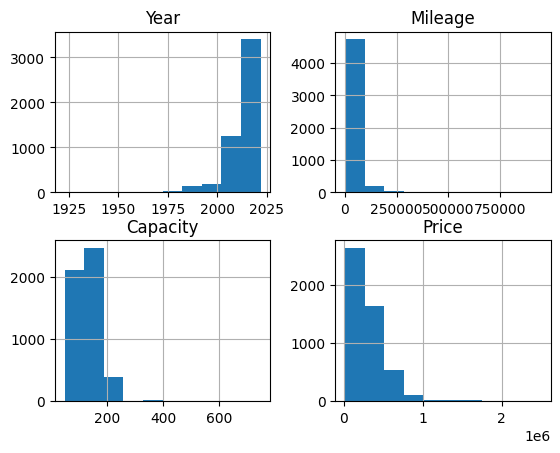

In [425]:
df.hist()
plt.show()

In [426]:
X = df.drop('Price', axis=1).to_numpy()
y = df.Price

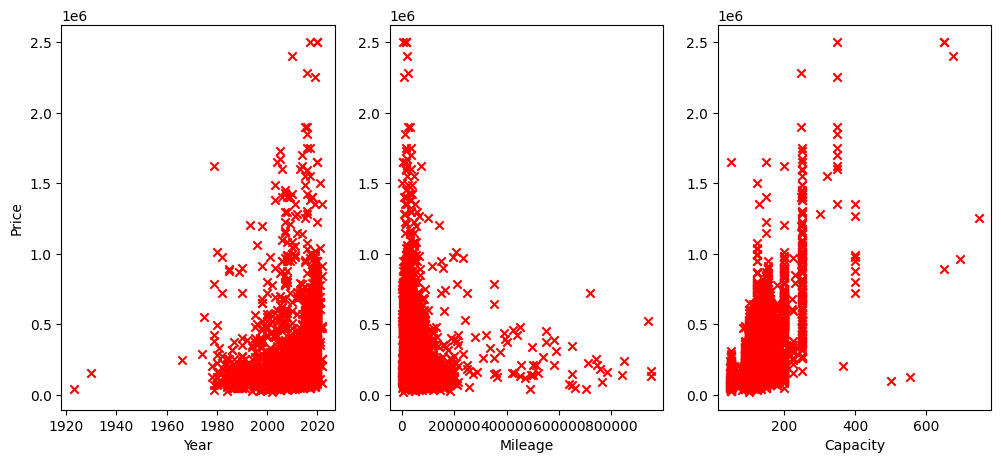

In [427]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

x_labels = ['Year', 'Mileage', 'Capacity']
for i in range(3) :
    axs[i].scatter(X[:,i], y, marker='x', c='r')
    axs[i].set_xlabel(x_labels[i])

axs[0].set_ylabel('Price')
plt.show()

In [428]:
X_train, X_, y_train, y_ = train_test_split(X,y, test_size=0.40, random_state=10)
X_cv, X_test, y_cv, y_test = train_test_split(X_,y_, test_size=0.50, random_state=10)

del X_, y_

print(f"Shape of the training set (input) is: {X_train.shape}")
print(f"Shape of the training set (target) is: {y_train.shape}\n")
print(f"Shape of the cross validation set (input) is: {X_cv.shape}")
print(f"Shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"Shape of the test set (input) is: {X_test.shape}")
print(f"Shape of the test set (target) is: {y_test.shape}")

Shape of the training set (input) is: (2997, 3)
Shape of the training set (target) is: (2997,)

Shape of the cross validation set (input) is: (999, 3)
Shape of the cross validation set (target) is: (999,)

Shape of the test set (input) is: (999, 3)
Shape of the test set (target) is: (999,)


In [429]:
train_mses = []
cv_mses = []
models = []
scalers = []
polys = []

for degree in range(1, 5) :    
    
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(X_train)
    polys.append(poly)
    
    scaler = StandardScaler()
    X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
    scalers.append(scaler)
    
    model = LinearRegression(n_jobs=-1)
    model.fit(X_train_mapped_scaled, y_train)
    models.append(model)
    
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(yhat, y_train) / 2
    train_mses.append(train_mse)
    
    X_cv_mapped = poly.transform(X_cv)
    X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
    
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)
  
print(train_mses)
print(cv_mses)

[19616680155.271072, 18631928884.310135, 16883320956.545124, 15846550588.908361]
[16776710085.036068, 18093681560.02559, 24240589760.66092, 58235980277.39148]


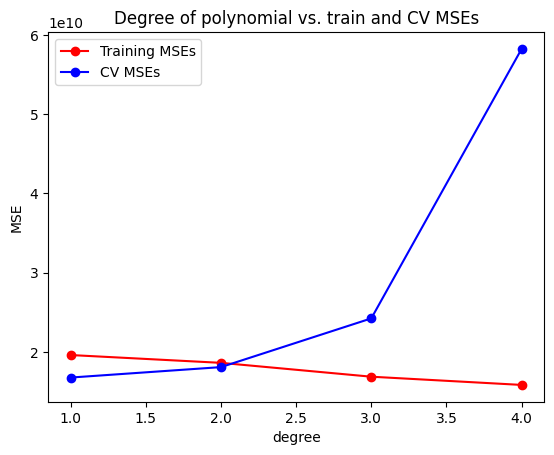

In [430]:
degrees = range(1,5)
plt.plot(degrees, train_mses, marker='o', c='r', label='Training MSEs')
plt.plot(degrees, cv_mses, marker='o', c='b', label='CV MSEs')
plt.title("Degree of polynomial vs. train and CV MSEs")
plt.xlabel("degree")
plt.ylabel("MSE") 
plt.legend()
plt.show()

In [431]:
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

X_test_mapped = polys[degree-1].transform(X_test)
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(yhat, y_test)/2

print(f"Train MSE : {train_mses[degree-1]}")
print(f"CV MSE : {cv_mses[degree-1]}")
print(f"Test MSE : {test_mse}")
print(f"R² : {r2_score(y_test, yhat)}")

Lowest CV MSE is found in the model with degree=1
Train MSE : 19616680155.271072
CV MSE : 16776710085.036068
Test MSE : 16171212441.368755
R² : 0.34085754716001737


## Using Model to Predict

In [432]:
year = 2021
mileage = 50000
capacity = 400

X_mapped = polys[degree-1].transform([[year, mileage, capacity]])
X_mapped_scaled = scalers[degree-1].transform(X_mapped)
print(f"Predicted price : Rs. {models[degree-1].predict(X_mapped_scaled)[0]:.2f}")

Predicted price : Rs. 1131386.71
